In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("../data/processed_data/CREMP_Pcover_2023_StonyCoralSpecies.csv")

C:\Users\Elite\AppData\Local\Temp\ipykernel_29248\241186464.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Species', y='Average Cover', data=species_cover, palette='viridis')


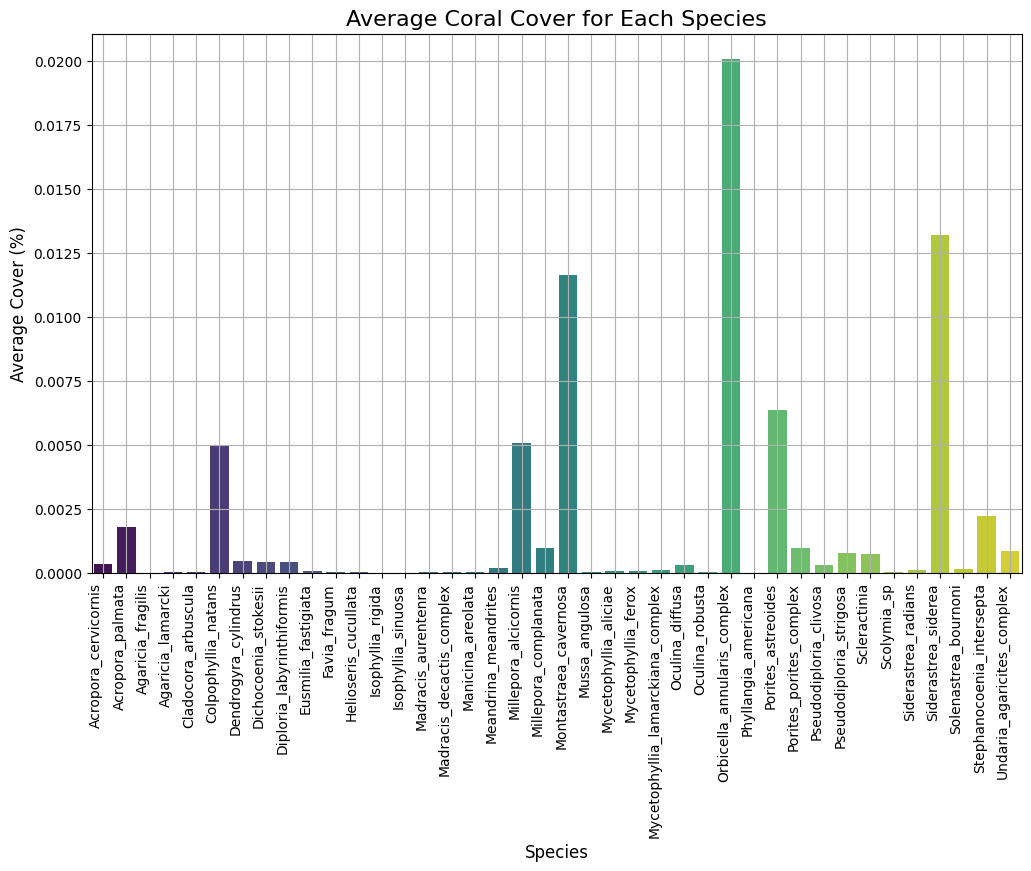

In [2]:
# 1. Average Coral Cover for Each Species (Bar Plot)
species_columns = ['Acropora_cervicornis', 'Acropora_palmata', 'Agaricia_fragilis', 'Agaricia_lamarcki',
                   'Cladocora_arbuscula', 'Colpophyllia_natans', 'Dendrogyra_cylindrus', 'Dichocoenia_stokesii',
                   'Diploria_labyrinthiformis', 'Eusmilia_fastigiata', 'Favia_fragum', 'Helioseris_cucullata', 
                   'Isophyllia_rigida', 'Isophyllia_sinuosa', 'Madracis_aurentenra', 'Madracis_decactis_complex', 
                   'Manicina_areolata', 'Meandrina_meandrites', 'Millepora_alcicornis', 'Millepora_complanata', 
                   'Montastraea_cavernosa', 'Mussa_angulosa', 'Mycetophyllia_aliciae', 'Mycetophyllia_ferox',
                   'Mycetophyllia_lamarckiana_complex', 'Oculina_diffusa', 'Oculina_robusta', 'Orbicella_annularis_complex', 
                   'Phyllangia_americana', 'Porites_astreoides', 'Porites_porites_complex', 'Pseudodiploria_clivosa', 
                   'Pseudodiploria_strigosa', 'Scleractinia', 'Scolymia_sp', 'Siderastrea_radians', 'Siderastrea_siderea', 
                   'Solenastrea_bournoni', 'Stephanocoenia_intersepta', 'Undaria_agaricites_complex']

# Calculate the average coral cover for each species
species_cover = data[species_columns].mean().reset_index(name='Average Cover')
species_cover.columns = ['Species', 'Average Cover']

# Plot the average coral cover for each species
plt.figure(figsize=(12, 7))
sns.barplot(x='Species', y='Average Cover', data=species_cover, palette='viridis')
plt.title('Average Coral Cover for Each Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Average Cover (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.savefig("../plots/stony_coral_cover_by_species.png")
plt.show()
plt.close()

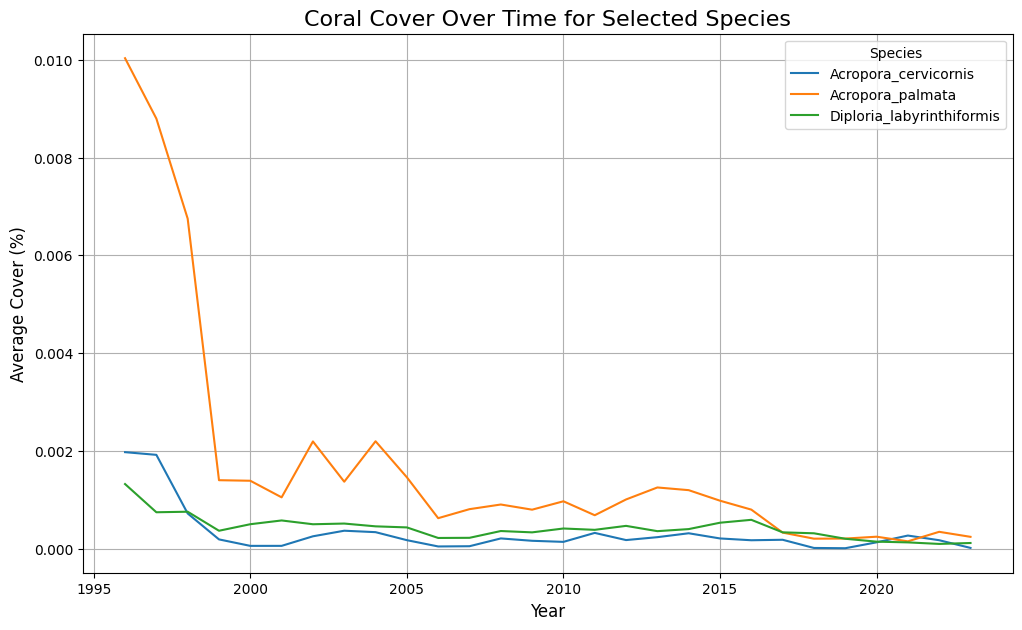

In [5]:
# 2. Coral Cover Over Time for Selected Species (Line Plot)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Choose a few species to plot over time
selected_species = ['Acropora_cervicornis', 'Acropora_palmata', 'Diploria_labyrinthiformis']

cover_over_time = data[['Year'] + selected_species].groupby('Year').mean().reset_index()

# Plot the coral cover over time for selected species
plt.figure(figsize=(12, 7))
for species in selected_species:
    sns.lineplot(x='Year', y=species, data=cover_over_time, label=species)
plt.title('Coral Cover Over Time for Selected Species', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Cover (%)', fontsize=12)
plt.legend(title='Species')
plt.grid(True)
plt.savefig("../plots/stony_coral_cover_over_time.png")
plt.show()
plt.close()